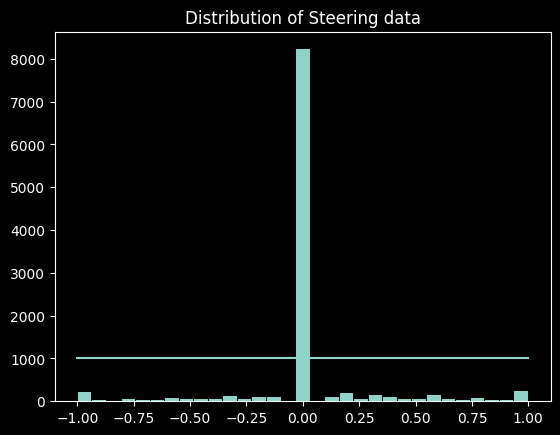

removed imgs:  7223
remain imgs:  3250


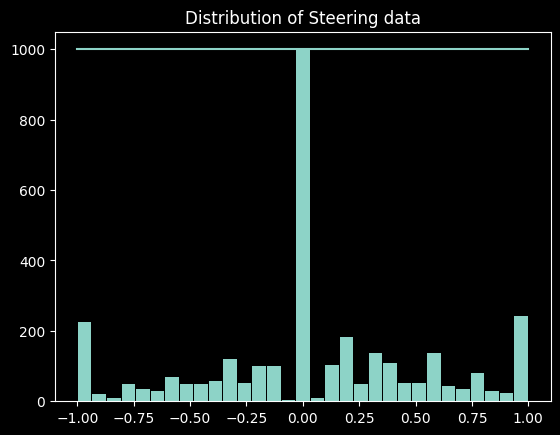

,Center,Left,Right,Steering,Throttle,Brake,Speed
2,center_2022_10_18_15_59_57_233.jpg,C:\Users\viet tran\Desktop\Masterthesis\data\I...,C:\Users\viet tran\Desktop\Masterthesis\data\I...,0.00,0.0,0.0,22.45945
4,center_2022_10_18_15_59_57_380.jpg,C:\Users\viet tran\Desktop\Masterthesis\data\I...,C:\Users\viet tran\Desktop\Masterthesis\data\I...,0.00,0.0,0.0,22.14441
10,center_2022_10_18_15_59_57_916.jpg,C:\Users\viet tran\Desktop\Masterthesis\data\I...,C:\Users\viet tran\Desktop\Masterthesis\data\I...,0.00,0.0,0.0,20.97013
15,center_2022_10_18_15_59_58_456.jpg,C:\Users\viet tran\Desktop\Masterthesis\data\I...,C:\Users\viet tran\Desktop\Masterthesis\data\I...,0.00,0.0,0.0,19.85364
17,center_2022_10_18_15_59_58_675.jpg,C:\Users\viet tran\Desktop\Masterthesis\data\I...,C:\Users\viet tran\Desktop\Masterthesis\data\I...,-0.35,0.0,0.0,19.35325
...,...,...,...,...,...,...,...
10432,center_2022_10_19_08_16_04_533.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.35,0.0,0.0,27.48667
10433,center_2022_10_19_08_16_04_628.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.60,0.0,0.0,27.00989
10434,center_2022_10_19_08_16_04_709.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.80,0.0,0.0,26.53893
10435,center_2022_10_19_08_16_04_792.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,1.00,0.0,0.0,25.86127


In [1]:
from helper import * 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

path = 'data'
df = load_data(f'{path}/driving_log.csv')
df = balance_data(df, 'Steering')
df

The car go straight most of the time that makes steering values around 0 extremely higher than the other. Drop the steering data to balance the whole dataset. 

In [2]:
imgPath, steering = load_data_toArray(path, df)
# fixed value for random_state to keep train and test datasets same each time
X_train, X_val, Y_train, Y_val = train_test_split(imgPath, steering, test_size=0.2, random_state=1) 
print(X_train.shape)
print(Y_train.shape)
print("Training imgs: ", len(X_train))
print("Test imgs: ", len(X_val))

(2600,)
(2600,)
Training imgs:  2600
Test imgs:  650


In [3]:
optim = build_optimizer('adam', 0.01)
model = build_network('elu', optim)
''' 
Iterations: number of batches to complete one epoch 
Batches: number of training samples in one iteration 
Steps per epoch = number of training sample // batch size
'''
batch_size = 10
hist = model.fit(batch_generator(X_train, Y_train, batch_size, 1), steps_per_epoch=X_train.shape[0]//batch_size,
        validation_data=batch_generator(X_val, Y_val, batch_size, 0), validation_steps=X_val.shape[0]//batch_size, epochs=10)

Epoch 1/10
260/260 [==============================] - 30s 113ms/step - loss: 0.2306 - accuracy: 0.3077 - val_loss: 0.1855 - val_accuracy: 0.3031
Epoch 2/10
 22/260 [=>............................] - ETA: 24s - loss: 0.2362 - accuracy: 0.2818

KeyboardInterrupt: 

In [ ]:
import plotly.express as px 

fig = px.line(y=[hist.history['loss'], hist.history['val_loss']])
fig.show()